In [17]:
import joblib

import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection as model_selection

from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [18]:
NUM_COLS = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [19]:
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('lottery.csv')
df.describe()

,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine
count,6985.000000,6985.000000,6985.000000,6985.000000,6985.000000,6985.000000,6985.000000,6985.000000,6985.000000,6985.000000
mean,10.438082,10.599284,10.603150,10.572799,10.627917,10.533572,10.540301,10.615891,10.535576,10.539012
std,3.300948,3.311903,3.330496,3.307833,3.298181,3.315683,3.298289,3.347146,3.333106,3.274079
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,10.000000,11.000000,11.000000,11.000000,11.000000,10.000000,11.000000,11.000000,10.000000,10.000000
75%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,26.000000,22.000000,22.000000,24.000000,28.000000,24.000000,23.000000,23.000000,24.000000,24.000000


In [20]:
# Loại bỏ các hàng có tất cả các cột từ zero đến nine đều bằng 0
df = df[df.iloc[:, 1:].all(axis=1)]
df.describe()

,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine
count,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000
mean,10.562310,10.740751,10.744669,10.713913,10.769766,10.674162,10.680981,10.757580,10.676193,10.679675
std,3.081324,3.097650,3.117607,3.094465,3.081445,3.104772,3.085629,3.135041,3.123527,3.059450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,9.000000
50%,10.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,26.000000,22.000000,22.000000,24.000000,28.000000,24.000000,23.000000,23.000000,24.000000,24.000000


In [21]:
# Chuẩn bị dữ liệu
X = df.drop(columns=['Date']).values
y = df[NUM_COLS].values

In [22]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Chuẩn hóa dữ liệu bằng scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Reshape lại dữ liệu để phù hợp với input của mạng LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [25]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(10))
model.compile(loss='mse', optimizer='adam')

In [26]:
# Huấn luyện mô hình
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=16, validation_data=(X_test_reshaped, y_test), verbose=2)

Epoch 1/100
345/345 - 2s - loss: 52.3043 - val_loss: 9.6407 - 2s/epoch - 5ms/step
Epoch 2/100
345/345 - 0s - loss: 9.6236 - val_loss: 9.5062 - 372ms/epoch - 1ms/step
Epoch 3/100
345/345 - 0s - loss: 9.5967 - val_loss: 9.4771 - 400ms/epoch - 1ms/step
Epoch 4/100
345/345 - 0s - loss: 9.5749 - val_loss: 9.4618 - 382ms/epoch - 1ms/step
Epoch 5/100
345/345 - 0s - loss: 9.5467 - val_loss: 9.4333 - 356ms/epoch - 1ms/step
Epoch 6/100
345/345 - 0s - loss: 9.5052 - val_loss: 9.3700 - 370ms/epoch - 1ms/step
Epoch 7/100
345/345 - 0s - loss: 9.4471 - val_loss: 9.3073 - 376ms/epoch - 1ms/step
Epoch 8/100
345/345 - 0s - loss: 9.3407 - val_loss: 9.1666 - 376ms/epoch - 1ms/step
Epoch 9/100
345/345 - 0s - loss: 9.1035 - val_loss: 8.8067 - 363ms/epoch - 1ms/step
Epoch 10/100
345/345 - 0s - loss: 8.5418 - val_loss: 7.9985 - 369ms/epoch - 1ms/step
Epoch 11/100
345/345 - 0s - loss: 7.4501 - val_loss: 6.6794 - 368ms/epoch - 1ms/step
Epoch 12/100
345/345 - 0s - loss: 5.9243 - val_loss: 5.0233 - 400ms/epoch - 

In [27]:
# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test Loss: {loss}')

Test Loss: 0.009913832880556583


In [28]:
# Lưu mô hình và scaler
model.save('lottery.keras')
joblib.dump(scaler, 'scaler.gz')

['scaler.gz']

In [29]:
# Nhập ngày cần lấy dữ liệu
ngay = '2024-02-15'

In [30]:
# Tạo dictionary giữa các cột từ zero đến nine và dự đoán tương ứng
row_scaled = scaler.transform(df.loc[df['Date'] == ngay, 'Zero':'Nine'].values)
predictions_dict = {col_name: prediction for col_name, prediction in zip(NUM_COLS, model.predict(row_scaled.reshape((row_scaled.shape[0], 1, row_scaled.shape[1])))[0])}
predictions_dict

1/1 [==============================] - 0s 223ms/step


{'Zero': 10.010414,
 'One': 12.010406,
 'Two': 12.0522,
 'Three': 12.022502,
 'Four': 10.061434,
 'Five': 16.097317,
 'Six': 11.995663,
 'Seven': 9.9710655,
 'Eight': 5.8991013,
 'Nine': 6.823844}

In [31]:
# Kết quả dự đoán cao nhất và thấp nhất
predictions_items = predictions_dict.items()
print(f'''Cặp số có giá trị dự đoán cao nhất: {dict(sorted(predictions_items, key=lambda x: x[1], reverse=True)[:2])}
Cặp số có giá trị dự đoán thấp nhất: {dict(sorted(predictions_items, key=lambda x: x[1])[:2])}''')

Cặp số có giá trị dự đoán cao nhất: {'Five': 16.097317, 'Two': 12.0522}
Cặp số có giá trị dự đoán thấp nhất: {'Eight': 5.8991013, 'Nine': 6.823844}


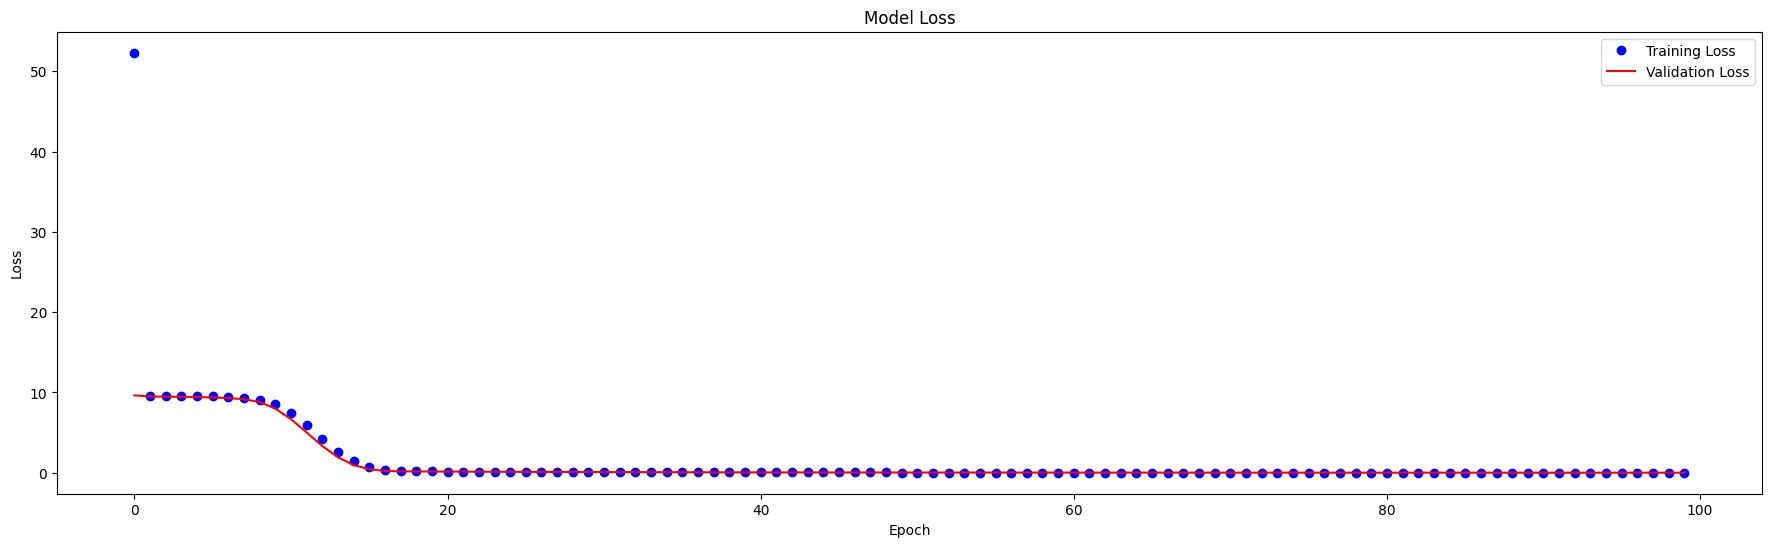

In [32]:
# Vẽ biểu đồ loss
plt.figure(figsize=(22, 6))
plt.plot(history.history['loss'],'bo', label='Training Loss')
plt.plot(history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()